In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import mavii
from skimage.feature import local_binary_pattern

%matplotlib inline

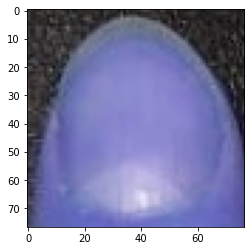

In [2]:
nail_image = cv2.imread('nails images/Nails-Pitting/ss1.jpg')
plt.imshow(nail_image)


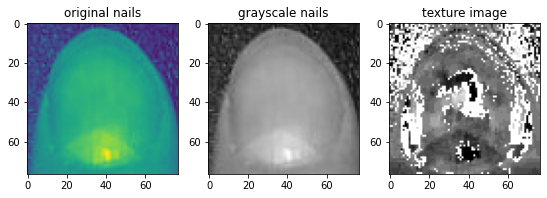

In [3]:
nail_image = cv2.imread('nails images/Nails-Pitting/ss1.jpg',cv2.IMREAD_GRAYSCALE)
height,width = nail_image.shape
total_points = 16
object_radius = 8
nails_texture = local_binary_pattern(nail_image,total_points,object_radius,method="uniform")
total_bins = int(nails_texture.max()+1)
texture_data = np.histogram(nails_texture,density=True,bins=total_bins,range=(0,total_bins))

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(width/10,height/10))

axes[0].set_title("original nails")
axes[0].imshow(nail_image)

axes[1].set_title("grayscale nails")
axes[1].imshow(nail_image, cmap="gray")

axes[2].set_title("texture image")
axes[2].imshow(nails_texture, cmap="gray")

plt.tight_layout()

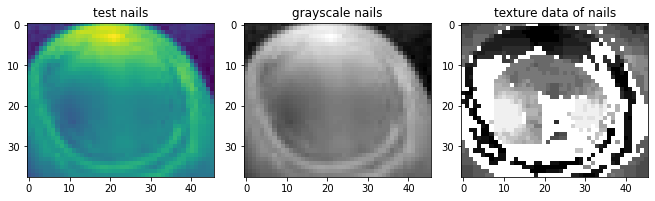

In [15]:
#grabing the texture data from testing material
test_nails = cv2.imread("nails images/Real time data/ss.jpeg",cv2.IMREAD_GRAYSCALE)
height,width = test_nails.shape
total_points = 16
object_radius = 8
test_texture = local_binary_pattern(test_nails,total_points,object_radius,method="uniform")
total_bins = int(test_texture.max()+1)
test_data,_ =np.histogram(test_texture,density=True,bins=total_bins)

fig,axes = plt.subplots(nrows=1,ncols = 3,figsize=(width/5,height/5))

axes[0].set_title("test nails")
axes[0].imshow(test_nails)

axes[1].set_title("grayscale nails")
axes[1].imshow(test_nails, cmap="gray")

axes[2].set_title("texture data of nails")
axes[2].imshow(test_texture,cmap="gray")

plt.tight_layout()

In [ ]:
axes[0].set_title("test nails")
axes[0].imshow(test_nails)

In [5]:
from skimage import io
from skimage.feature import greycomatrix, greycoprops


[[0.29598471 0.30356    0.29237569 ... 0.28703255 0.26492471 0.25795255]
 [0.31727412 0.29628235 0.27390667 ... 0.27835608 0.28061098 0.27756039]
 [0.28451765 0.26856353 0.24618784 ... 0.26884627 0.24645569 0.23556196]
 ...
 [0.42002745 0.44523843 0.4732549  ... 0.4863502  0.49784706 0.50682118]
 [0.40012902 0.42563059 0.44720275 ... 0.48467569 0.4911349  0.49505647]
 [0.38052118 0.40461608 0.42367333 ... 0.47739804 0.47684745 0.47684745]]


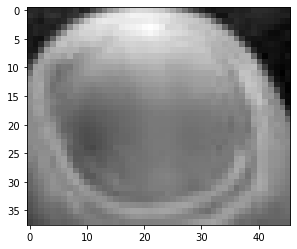

In [9]:
PATCH_SIZE = 35
image = io.imread('nails images/Real time data/ss.jpeg',as_gray=True)
print(image)
plt.imshow(image, cmap='gray')

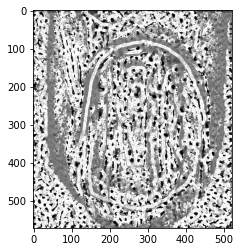

In [13]:
image = io.imread('nails images/Real time data/ss.jpeg',as_gray=True)
nails_texture = local_binary_pattern(image,total_points,object_radius,method="uniform")
total_bins = int(nails_texture.max()+1)
texture_data = np.histogram(nails_texture,density=True,bins=total_bins,range=(0,total_bins))
plt.imshow(test_texture,cmap="gray")


In [8]:
glcm = greycomatrix(image.astype(int),[1],[0, np.pi/4, np.pi/2, 3*np.pi/4])

ValueError: The levels argument is required for data types other than uint8. The resulting matrix will be at least levels ** 2 in size.

In [10]:


cell_locations = [(50, 50), (200, 50), (50, 350), (200, 350)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])


0.03426288927614647


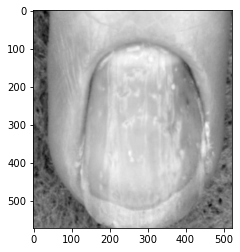

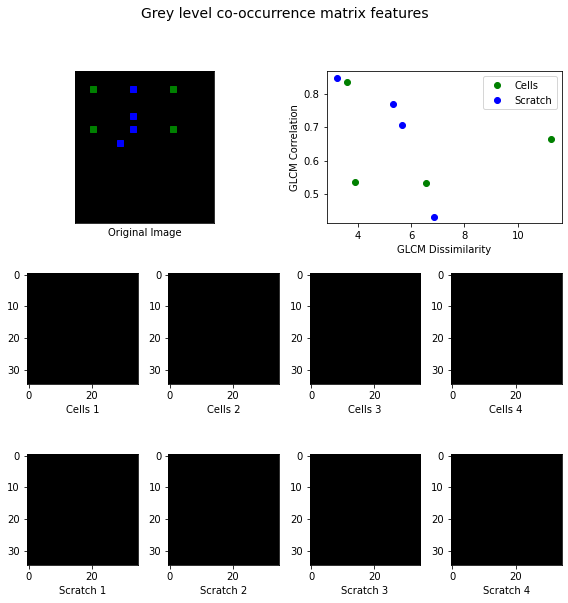

In [17]:
# https://youtu.be/5x-CIHRmMNY
"""
@author: Sreenivas Bhattiprolu
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html

skimage.feature.greycomatrix(image, distances, angles, levels=None, symmetric=False, normed=False)
distances - List of pixel pair distance offsets.
angles - List of pixel pair angles in radians.

skimage.feature.greycoprops(P, prop)
prop: The property of the GLCM to compute.
{‘contrast’, ‘dissimilarity’, ‘homogeneity’, ‘energy’, ‘correlation’, ‘ASM’}

"""

import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np

PATCH_SIZE = 35

image = io.imread('nails images/Nails-Pitting/ss3.jpg',as_gray=True)
im = skimage.img_as_ubyte(image)
plt.imshow(image, cmap='gray')

#Full image
GLCM = greycomatrix(im, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
a= greycoprops(GLCM, 'energy')[0, 0]

print(a)

# select some patches from grassy areas of the image
cell_locations = [(50, 50), (200, 50), (50, 350), (200, 350)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
scratch_locations = [(50, 200), (150, 200), (250, 150), (200, 200)]
scratch_patches = []
for loc in scratch_locations:
    scratch_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
for patch in (cell_patches + scratch_patches):
    z=skimage.img_as_ubyte(patch)
    glcm = greycomatrix(z, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(greycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(greycoprops(glcm, 'correlation')[0, 0])
    homogen.append(greycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(greycoprops(glcm, 'energy')[0, 0])
    contrast.append(greycoprops(glcm, 'contrast')[0, 0])


# OPTIONAL PLOTTING for Visualization of points and patches
# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in scratch_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(diss_sim[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(diss_sim[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(cell_patches):
    ax = fig.add_subplot(3, len(cell_patches), len(cell_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cells %d' % (i + 1))

for i, patch in enumerate(scratch_patches):
    ax = fig.add_subplot(3, len(scratch_patches), len(scratch_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Scratch %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [12]:
import skimage.io
import skimage.feature
im = skimage.io.imread('nails images/Nails-Pitting/ss3.jpg', as_gray=True)
img = skimage.img_as_ubyte(im)
img1=img/128
print(img1)
img2=skimage.img_as_ubyte(img1)
g = skimage.feature.greycomatrix(img2, [1], [0], levels=8, symmetric=False, normed=True)
cont= skimage.feature.greycoprops(g, 'contrast')[0][0]
eng= skimage.feature.greycoprops(g, 'energy')[0][0]
homo= skimage.feature.greycoprops(g, 'homogeneity')[0][0]
core =skimage.feature.greycoprops(g, 'correlation')[0][0]
print(cont,eng,homo,core)

[[0.546875  0.53125   0.546875  ... 0.890625  0.890625  0.8984375]
 [0.5390625 0.5234375 0.53125   ... 0.84375   0.8515625 0.84375  ]
 [0.515625  0.5       0.5078125 ... 0.8046875 0.8046875 0.796875 ]
 ...
 [0.9921875 1.0234375 1.0078125 ... 0.953125  0.9453125 0.9375   ]
 [0.9921875 1.0234375 1.015625  ... 0.921875  0.9140625 0.90625  ]
 [0.9765625 1.015625  1.0234375 ... 0.90625   0.8984375 0.890625 ]]


ValueError: Images of type float must be between -1 and 1.